In [7]:
from keras.models import Sequential  
from keras.layers import Dense, Flatten
import keras
from collections import deque 
import numpy as np
import gym 
env = gym.make('LunarLander-v2')  
import random

In [13]:
# Load Model Here
model = keras.models.load_model('LLPromising')

In [14]:
# Stats
rewardTrack = []

In [17]:
for i in range(100):
    observation = env.reset()
    obs = np.expand_dims(observation, axis=0)
    state = np.stack((obs, obs), axis=1)
    done = False
    tot_reward = 0.0
    gameTime = 0
    while not done:
#         if gameTime >= 20:
#             gameTime = 0
#             env.reset()
#             continue
#         else:
#             gameTime += 1
        
        env.render()
        Q = model.predict(state)        
        action = np.argmax(Q)         
        observation, reward, done, info = env.step(action)
        obs = np.expand_dims(observation, axis=0)
        state = np.append(np.expand_dims(obs, axis=0), state[:, :1, :], axis=1)    
        tot_reward += reward
        rewardTrack.append(tot_reward)
    print('Game ended! Total reward: {}'.format(tot_reward))

Game ended! Total reward: -123.09690891199017
Game ended! Total reward: -85.61629994771398
Game ended! Total reward: -100.62994173440327
Game ended! Total reward: -81.15618854182438
Game ended! Total reward: -61.105884180201436
Game ended! Total reward: -69.94347337691315
Game ended! Total reward: -136.47981849535915
Game ended! Total reward: -293.2142759228375
Game ended! Total reward: -179.32806030241636
Game ended! Total reward: -172.31641296044256
Game ended! Total reward: -65.52488843692136
Game ended! Total reward: -131.05998222835652
Game ended! Total reward: 15.069847243605025
Game ended! Total reward: -128.97178811304428


KeyboardInterrupt: 

In [18]:
env.close()

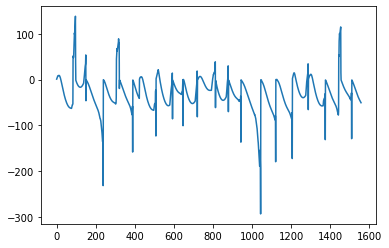

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(len(rewardTrack)), rewardTrack)
plt.show()